In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

green = (0,255,0)

In [ ]:
#Read image
image = cv2.imread("/content/apple.png")

In [ ]:
# Convenient function to just show image
def show_image(image, gray_scale=None):
  plt.figure(figsize=(6,6))
  if gray_scale:
    plt.imshow(image, plt.cm.gray)
  else:
    plt.imshow(image)
  plt.show()

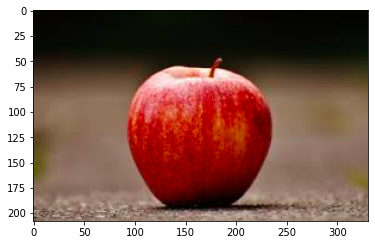

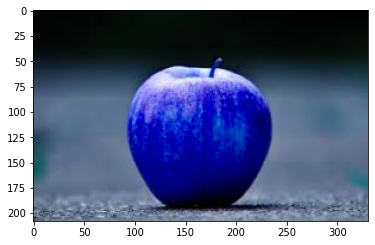

In [ ]:
#BGR -> RGB
colored_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert bgr to rgb
show_image(colored_image)

show_image(image)


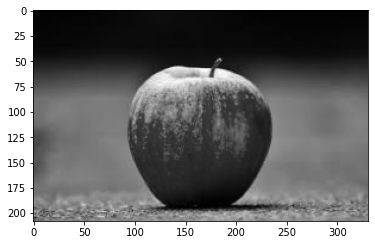

In [ ]:
#RGB -> GRAY
bw_im = cv2.cvtColor(colored_image,cv2.COLOR_RGB2GRAY)
show_image(bw_im, gray_scale=True)

In [ ]:

#Convert BGR to HSV to focus on color
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#Color strength parameters in HSV
weaker = np.array([0,100,80])
stronger = np.array([10,255,255])





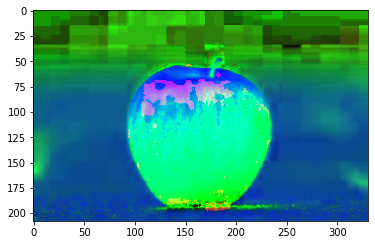

In [ ]:
#Show original image and result
show_image(hsv)

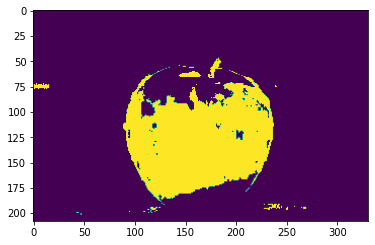

In [ ]:
#Threshold HSV image to obtain input color
mask = cv2.inRange(hsv, weaker, stronger) 

#Show original image and result
show_image(mask)

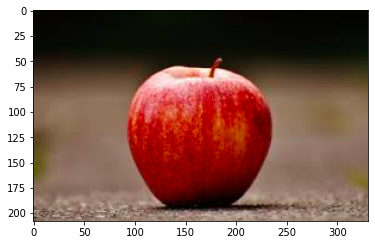

In [ ]:
show_image(colored_image)

In [ ]:
def find_biggest_contour(image):
    # copy image to make changes
    image = image.copy()
    contours,hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # get all contour area and store in contour size array
    # isolatinag largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    # print (contour_sizes, contours)
    
    biggest_contour = max(contour_sizes, key= lambda x: x[0])[1]
    # return biggest contour
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask,[biggest_contour], -1,-255,-1)
    return biggest_contour,mask
    

In [ ]:
def circle_contour(image,contour):
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(contour)
    cv2.ellipse(image_with_ellipse,ellipse, green, 2, cv2.LINE_AA)
    return image_with_ellipse 

In [ ]:
def overlay_mask(mask,image):
    rgb_mask = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.8,image, 0.5, 0)
    return img

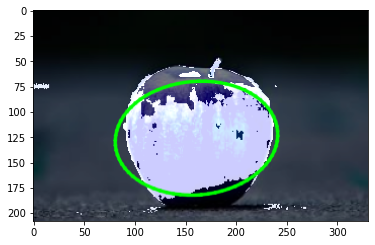

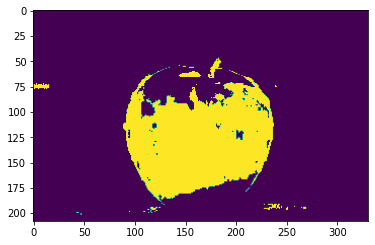

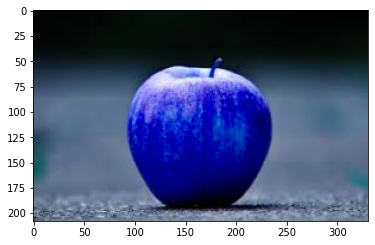

In [ ]:
# this contour finds bigggest contour and biggest apple
big_apple_contour, mask_apples = find_biggest_contour(mask)

# overlay this mask on image
overlay = overlay_mask(mask, image)
# circle the biggest apple
circled = circle_contour(overlay, big_apple_contour)
show_image(circled)
show_image(mask)
show_image(image)


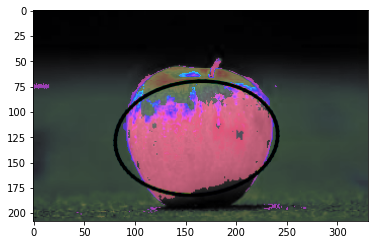

In [ ]:
# convert back to original color scheme 
bgr = cv2.cvtColor(circled, cv2.COLOR_HSV2BGR)
show_image(bgr)